<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_49_Regression_Metrics_MSE%2C_MAE_RMSE_R2_Score_%26_Adjusted_R2_Score/Lecture_49_Regression_Metrics_MSE%2C_MAE_RMSE_R2_Score_%26_Adjusted_R2_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Metrics | MSE, MAE & RMSE | R2 Score & Adjusted R2 Score**

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('/content/placement1.csv')

In [17]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [18]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

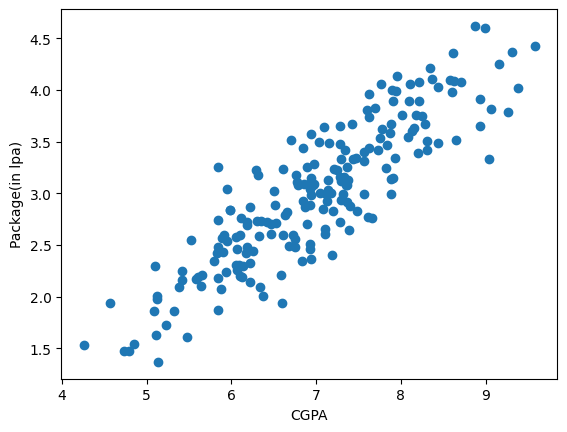

In [19]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [20]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [21]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

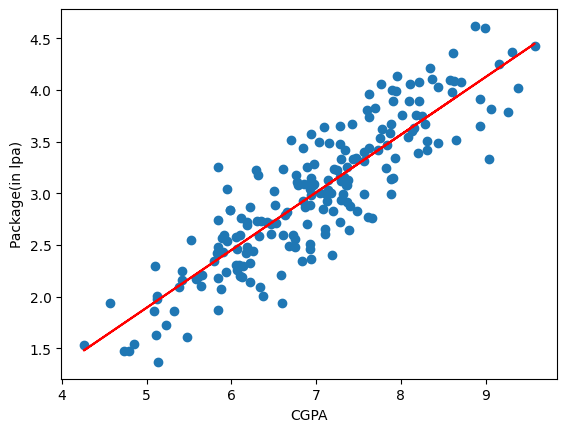

In [26]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [30]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [31]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [32]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [33]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [34]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [35]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [36]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.946942,3.26
1,5.12,0.570872,1.98
2,7.82,0.141713,3.25
3,7.42,0.412301,3.67
4,6.94,0.200028,3.57


Text(0, 0.5, 'Package(in lpa)')

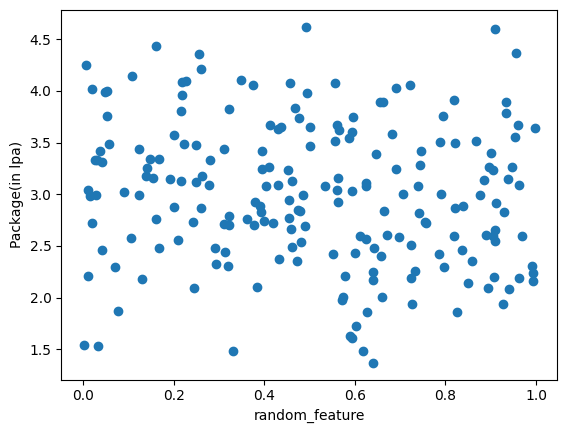

In [37]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [38]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test)

In [43]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.782273571160599


In [44]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7705045750071179

In [45]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [46]:
new_df2.sample(5)

,cgpa,iq,package
77,8.99,3.50,4.60
111,5.42,1.55,2.25
151,6.12,3.06,2.76
103,7.05,3.50,3.00
20,7.28,3.96,3.16


Text(0, 0.5, 'Package(in lpa)')

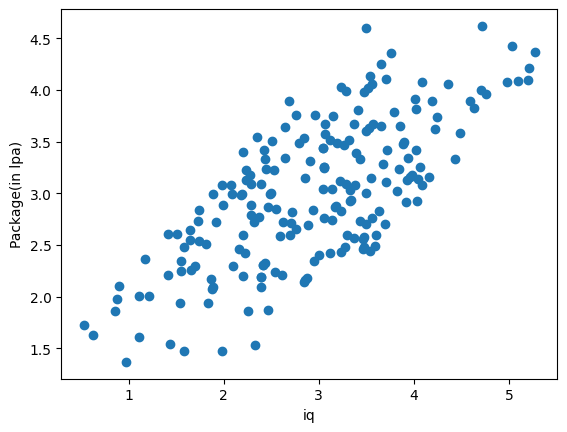

In [47]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [48]:
np.random.randint(-100,100)

67

In [49]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [52]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8455117459634036


In [53]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8371610295289931